Generate an agent that interacts with the environment by selecting workout plans to improve VO₂ max based on a fitness function evaluating each plan's effectiveness.

The agent evaluates plans based on a fitness function that considers the duration of workouts, intensity as a percentage of maximum heart rate (HR), and the frequency of workouts per week.

The agent uses Q-learning, with an epsilon-greedy strategy for action selection to balance exploration and exploitation of workout options.

The agent updates its Q-values based on the rewards received after each plan execution, iteratively refining its policy to optimize the final workout plan for maximum cardiovascular improvement.

Optimized Workout Plan for VO₂ max improvement:
Duration: 59 min, Intensity: 60% max HR, Frequency: 7 days per week


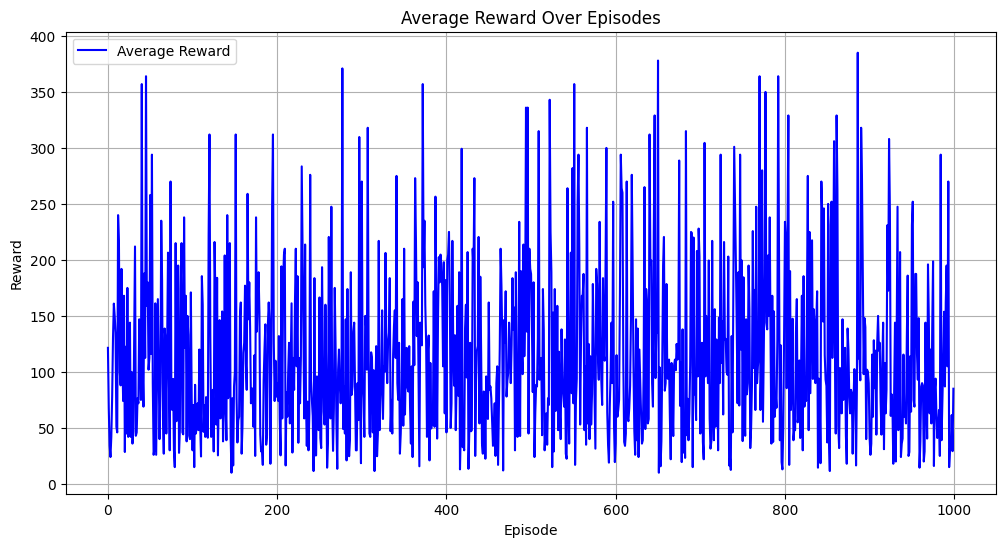

In [25]:
import numpy as np
import random
import matplotlib.pyplot as plt

ACTIONS = [60, 70, 80]
FREQUENCIES = [1, 2, 3, 4, 5, 6, 7]
STATES = ['short_duration', 'medium_duration', 'long_duration']
NUM_EPISODES = 1000
GAMMA = 0.9
ALPHA = 0.1
EPSILON = 0.1

q_table = np.zeros((len(STATES), len(ACTIONS), len(FREQUENCIES)))

def generate_population(pop_size):
    population = []
    for _ in range(pop_size):
        duration = random.randint(20, 60)
        intensity = random.randint(60, 90)
        frequency = random.randint(1, 7)
        population.append([duration, intensity, frequency])
    return population

def fitness_function(duration, intensity, frequency):
    if intensity < 70:
        return (0.5 * duration) * frequency
    elif intensity < 80:
        return (0.75 * duration) * frequency
    else:
        return (1.0 * duration - 5) * frequency

def get_state_index(duration):
    if duration < 30:
        return 0
    elif duration < 45:
        return 1
    else:
        return 2

def choose_action(state_index, frequency):
    if random.uniform(0, 1) < EPSILON:
        return random.choice(range(len(ACTIONS)))
    else:
        return np.argmax(q_table[state_index, :, frequency - 1])

def q_learning(num_episodes=NUM_EPISODES):
    avg_rewards = []

    for episode in range(num_episodes):
        population = generate_population(1)
        duration, intensity, frequency = population[0]

        state_index = get_state_index(duration)

        action_index = choose_action(state_index, frequency)
        action = ACTIONS[action_index]

        reward = fitness_function(duration, intensity, frequency)

        q_table[state_index, action_index, frequency - 1] += ALPHA * (reward + GAMMA * np.max(q_table[state_index, :, frequency - 1]) - q_table[state_index, action_index, frequency - 1])

        avg_rewards.append(reward)

    return avg_rewards

avg_rewards = q_learning()

population = generate_population(1)
duration, intensity, frequency = population[0]

state_index = get_state_index(duration)

optimal_action_index = np.argmax(q_table[state_index, :, frequency - 1])
optimal_intensity = ACTIONS[optimal_action_index]

print("Optimized Workout Plan for VO₂ max improvement:")
print(f"Duration: {duration} min, Intensity: {optimal_intensity}% max HR, Frequency: {frequency} days per week")

plt.figure(figsize=(12, 6))
plt.plot(avg_rewards, label='Average Reward', color='blue')
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Average Reward Over Episodes')
plt.legend()
plt.grid(True)
plt.show()
